# YOLOv8

In [1]:
# /home/chen_le/miniforge3/envs/tmnf_mmdet/bin/python
# /home/chen_le/miniforge3/envs/tmnf_mmdet/bin/pip

#!which python
#!which pip

### Data Preparation

In [2]:
# Depending on dataset size can take very long
# !./_data_preparation.sh

### Training

In [3]:
# Train with yolov8
# !./_train.sh

### Extraction

In [ ]:
# Extraction
# !./extract_feat_yolo.sh

### Inference

/home/chen/miniforge3/envs/tmnf_mmdet/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/chen/miniforge3/envs/tmnf_mmdet/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


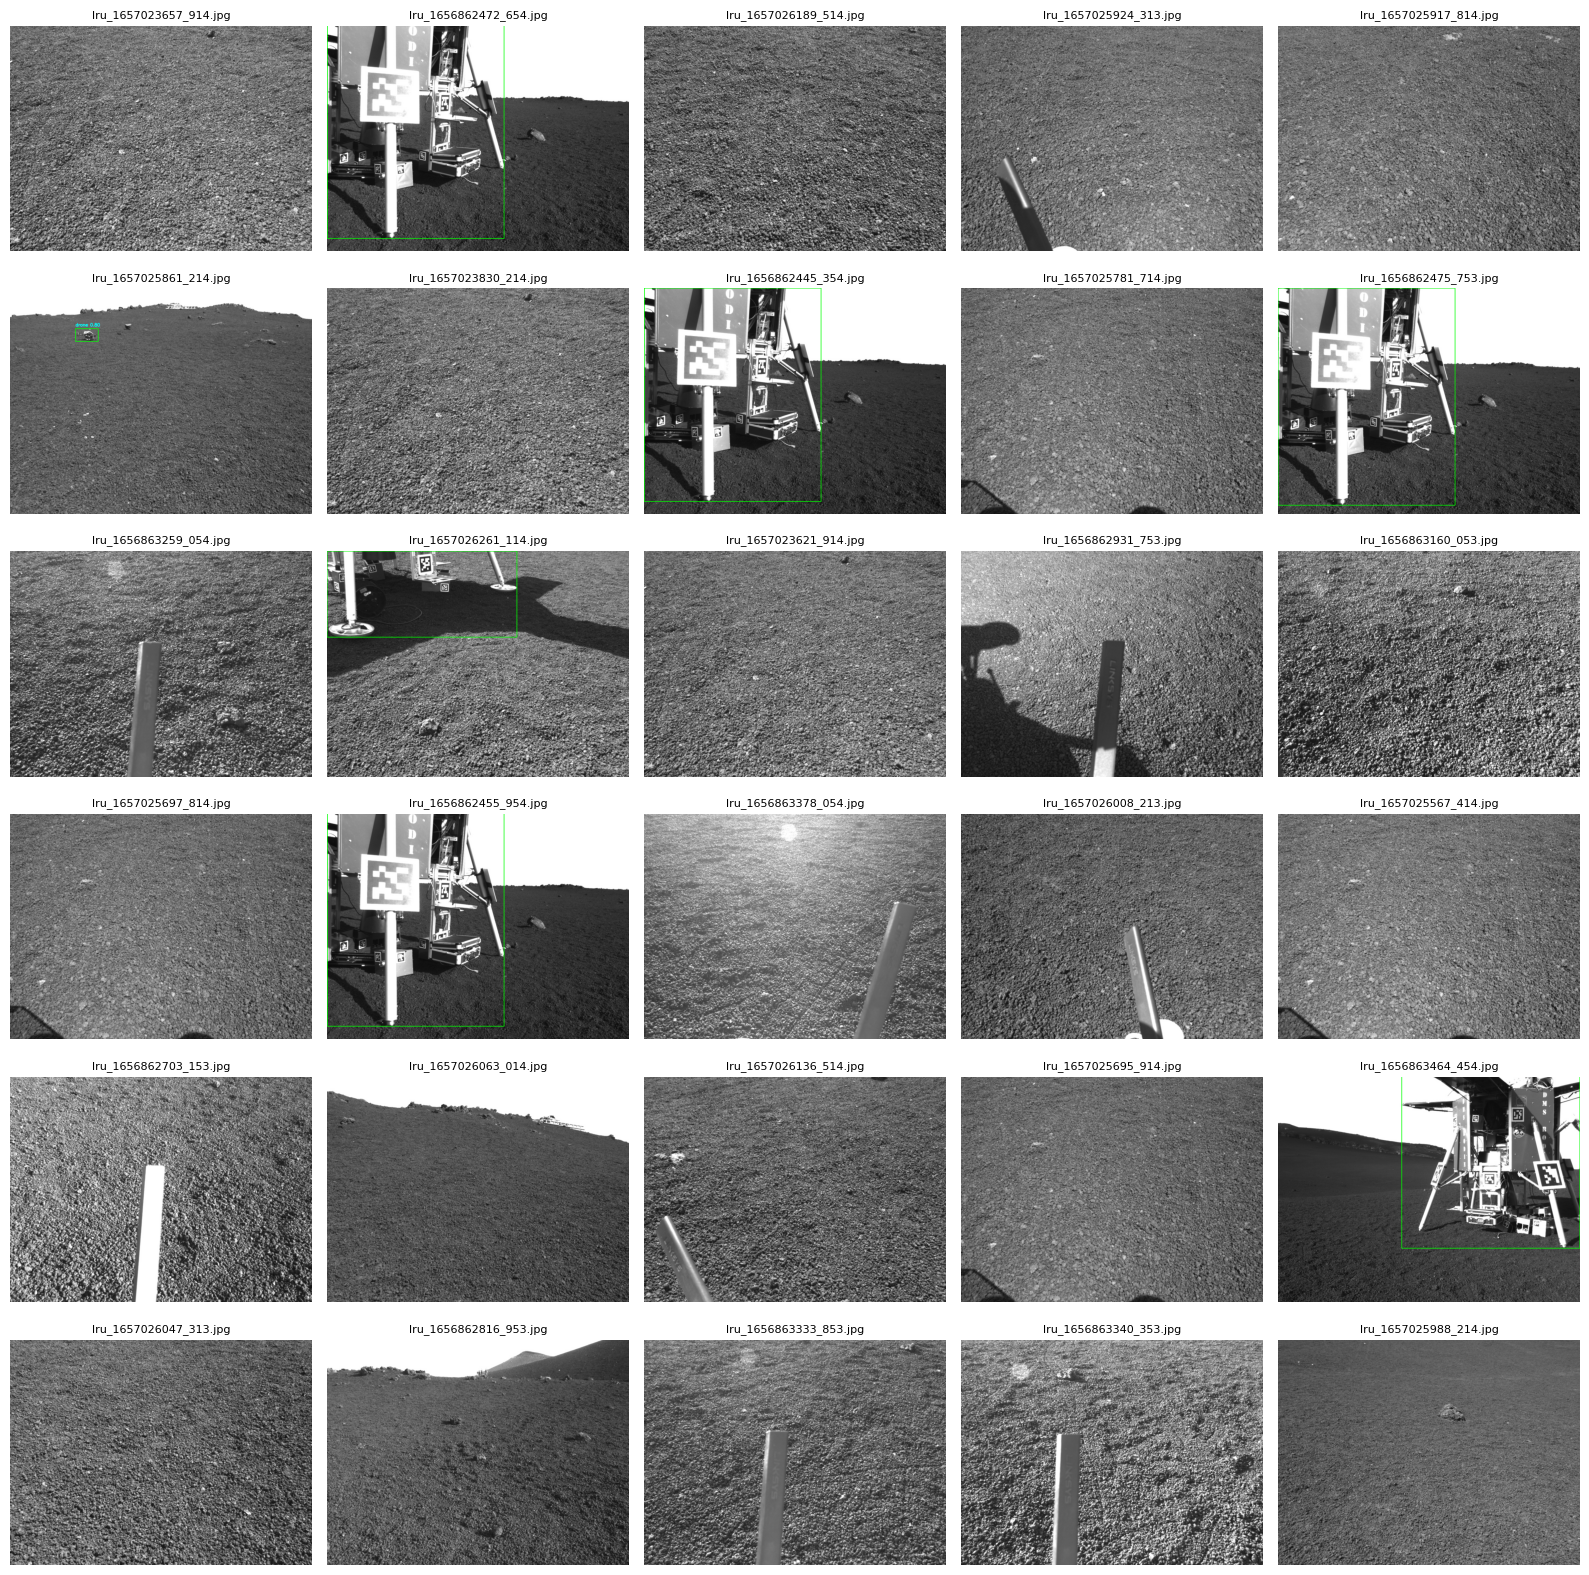

In [4]:
from extraction.feat_extraction_yolo import *

model_path = 'training/runs/detect/train_lru2/weights/best.pt'
image_dir = '/media/chen/76AECF8EAECF4579/data/lru1_all_labels/VOCdevkit/VOC2007CS_lru2/splits/images/test'

visualize_batch(model_path, image_dir)

### Extract logits for TMNF (WIP)

Processed 1 boxes
[{'activations': [0.9835330843925476, 1.0255045879148383e-07],
  'bbox': [0.95050048828125, 0.0, 757.3804321289062, 910.8787231445312],
  'bbox_xywh': [379.16546630859375,
                455.4393615722656,
                756.429931640625,
                910.8787231445312],
  'best_cls': 0.0,
  'best_conf': 0.9835330843925476,
  'image_id': '/media/chen/76AECF8EAECF4579/data/lru1_all_labels/VOCdevkit/VOC2007CS_lru2/splits/images/test/lru_1656862409_554.jpg',
  'logits': [4.089800834655762, -16.092910766601562]}]


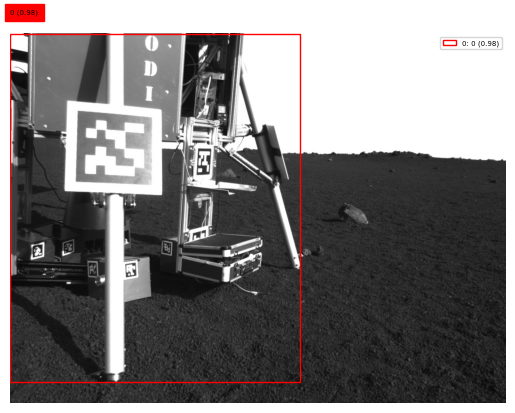

In [5]:
# Extract logits and reproduce inference results
from extraction.feat_extraction_yolo import *
import pprint

# Configuration
model_path = 'training/runs/detect/train_lru2/weights/best.pt'
img_path = '/media/chen/76AECF8EAECF4579/data/lru1_all_labels/VOCdevkit/VOC2007CS_lru2/splits/images/test/lru_1656862409_554.jpg'

# Load model and run inference
model, hooks = load_and_prepare_model(model_path)
results = run_predict_single(img_path, model,
                      hooks,
                      num_classes=2,
                      conf_threshold=0.5,
                      iou_threshold=0.7)

print("Processed", len(results), "boxes")
plot_image(img_path, results)
pprint.pprint(results)
# write_json(results)

In [ ]:
from extraction.feat_extraction_yolo import *

# Config
model_path = 'training/runs/detect/ardea10/weights/best.pt'
image_dir = '/media/chen/76AECF8EAECF4579/data/ardea10_run04_labels/VOCdevkit/VOC2007CS_lru2/splits/images/'

# Extract logits from trained YOLO model
splits = ['test', 'train', 'val']
for split in splits:
    print(f'{image_dir}/{split}/')
    results = run_inference_yolo(model_path,
                            f'{image_dir}/{split}/',
                            num_classes=2,
                            confThresh=0.2,
                            iouThresh=0.7)
    # TODO: Setting path
    save_results_json(results, f'/home/chen/TMNF/data/extracted_feat/flowDet_msfeats/YOLOv8/associated/VOCDataset/extraction_{split}')

In [ ]:
from extraction.pred_assignment_yolo import *

splits = ['train', 'val', 'test']
for split in splits:
    pred_assignment(split, 2, 0.2, 0.7)